# **<u>Uber Data Analysis</u>**

![](https://media.giphy.com/media/l378ttOMPcsaKMXVC/giphy.gif)

## **<u>Introduction</u>**

#### The modern era has witnessed a significant transformation in transportation with the advent of ride-sharing platforms. In this analysis, we delve into a comprehensive examination of a ride-sharing dataset, aiming to extract valuable insights that can inform business strategies and enhance the overall user experience.

### **Dataset Overview**
#### Our analysis is based on a rich dataset capturing a myriad of ride-sharing interactions. 

#### The dataset includes the following key columns:

#### **START_DATE**: The timestamp when the ride started.
#### **END_DATE**: The timestamp when the ride ended.
#### **CATEGORY**: The category of the ride (e.g., business, personal).
#### **START**: The starting location of the ride.
#### **STOP**: The destination or stopping location.
#### **MILES**: The distance covered during the ride.
#### **PURPOSE**: The purpose or reason for the ride.

### **Objectives**
#### The primary objectives of this analysis are as follows:

#### **Understand Ride Patterns**: Investigate the patterns and trends in ride data to uncover key metrics such as average ride duration, ride frequency, and distance traveled.

#### **Identify Popular Categories**: Explore the popularity of different ride categories, examining which types of rides are most prevalent among users.

#### **Temporal Analysis**: Analyze temporal aspects of ride-sharing, including variations in ride volume and user behavior across different timescales, such as days of the week and hours of the day.

#### **User Segmentation**: Segment users based on relevant characteristics and explore how different user groups interact with the ride-sharing service.

#### **Uncover Challenges and Opportunities**: Identify challenges and limitations in the dataset, acknowledging potential biases, and highlight opportunities for improvement or further investigation.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# Load the Uber dataset
df = pd.read_csv('/kaggle/input/uber-data-analysis/UberDataset.csv')

In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [4]:
# Summary statistics
print(df.describe())

              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


In [5]:
# Data Cleaning and Preprocessing
#Removing missing values

uber_data = df.dropna()


In [6]:
print("Data Info After Conversion:")
print(df.info())


Data Info After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [7]:
# Convert date columns to datetime with inferred format and handling errors
df['START_DATE'] = pd.to_datetime(df['START_DATE'], infer_datetime_format=True, errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], infer_datetime_format=True, errors='coerce')





/tmp/ipykernel_20/3170304052.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['START_DATE'] = pd.to_datetime(df['START_DATE'], infer_datetime_format=True, errors='coerce')
/tmp/ipykernel_20/3170304052.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['END_DATE'] = pd.to_datetime(df['END_DATE'], infer_datetime_format=True, errors='coerce')


In [8]:
# Impute missing dates with the mean or median
start_date_mean = df['START_DATE'].mean()
end_date_mean = df['END_DATE'].mean()

df['START_DATE'].fillna(start_date_mean, inplace=True)
df['END_DATE'].fillna(end_date_mean, inplace=True)


In [9]:
print("Data Info After Conversion:")
print(df.info())


Data Info After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1156 non-null   datetime64[ns]
 1   END_DATE    1156 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB
None


In [10]:
# Extract date-related features
df['START_DAY'] = df['START_DATE'].dt.day_name()
df['END_DAY'] = df['END_DATE'].dt.day_name()

In [11]:
# Calculate duration of the trip
df['DURATION_MINUTES'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60


In [12]:
# Display basic information about the cleaned dataset
print("\nData Info After Cleaning:")
print(df.info())


Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   START_DATE        1156 non-null   datetime64[ns]
 1   END_DATE          1156 non-null   datetime64[ns]
 2   CATEGORY          1155 non-null   object        
 3   START             1155 non-null   object        
 4   STOP              1155 non-null   object        
 5   MILES             1156 non-null   float64       
 6   PURPOSE           653 non-null    object        
 7   START_DAY         1156 non-null   object        
 8   END_DAY           1156 non-null   object        
 9   DURATION_MINUTES  1156 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 90.4+ KB
None


In [13]:
# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df.head())



Cleaned Dataset:
           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE  START_DAY    END_DAY  \
0      Fort Pierce    5.1   Meal/Entertain     Friday     Friday   
1      Fort Pierce    5.0              NaN   Saturday   Saturday   
2      Fort Pierce    4.8  Errand/Supplies   Saturday   Saturday   
3      Fort Pierce    4.7          Meeting    Tuesday    Tuesday   
4  West Palm Beach   63.7   Customer Visit  Wednesday  Wednesday   

   DURATION_MINUTES  
0               6.0  
1              12.0  
2              13.0  
3              14.0  
4              67.0  


## **<u>Exploratory Data Analysis</u>**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


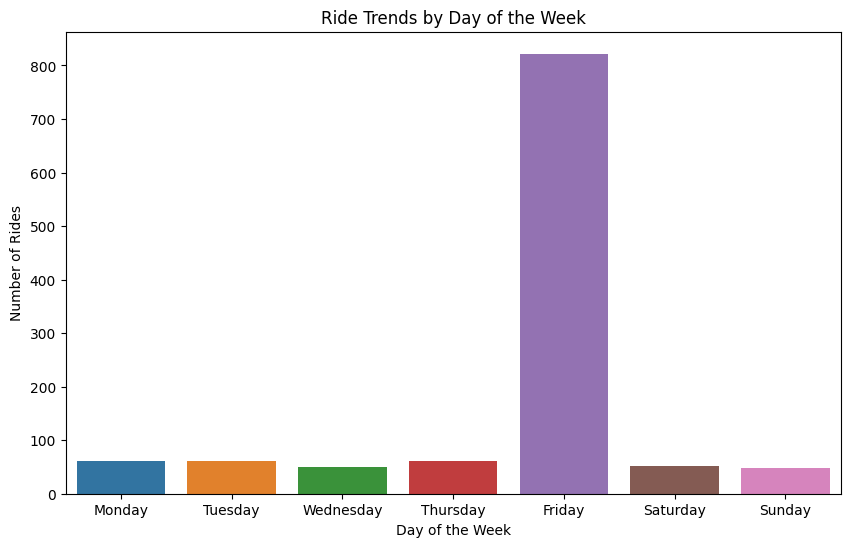

In [15]:
# Day of the week analysis
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot(x='START_DAY', data=df, order=day_of_week_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Ride Trends by Day of the Week')
plt.show()

#### Most Popular Day: **Friday**
 The analysis of the "START_DATE" reveals that a significant number of rides are taken on Fridays. This could be indicative of a higher demand for rides on Fridays compared to other days of the week. Understanding and capitalizing on this pattern can help optimize service availability and resource allocation on Fridays.

#### Recommendations:

* Consider offering special promotions or incentives on Fridays to further boost ride demand.
*  Ensure that there is ample availability of drivers and vehicles during peak hours on Fridays.

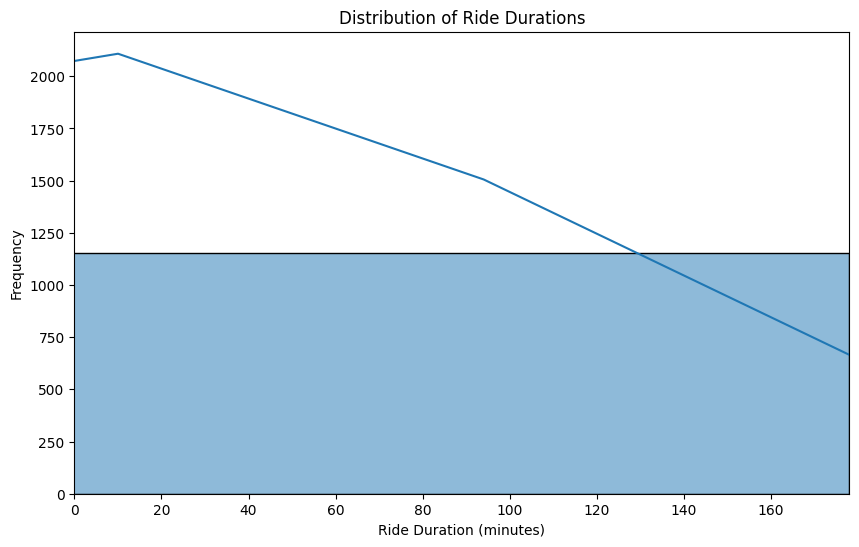

In [16]:
# Duration analysis without negative values
plt.figure(figsize=(10, 6))
sns.histplot(df['DURATION_MINUTES'], bins=30, kde=True)
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')

# Set x-axis limit to exclude negative values
plt.xlim(0, df['DURATION_MINUTES'].max())

plt.show()


The analysis of ride durations reveals that a significant portion of rides falls within the 0 to 40 minutes range. This is a crucial insight into user behavior, indicating that most users prefer relatively short-duration rides.

## **<u>Time Based Analysis</u>**

### Ride Trends Over Time:

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Convert 'START_DATE' to datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [19]:
# Extract information about the month, day, and hour
df['Month'] = df['START_DATE'].dt.month
df['Day'] = df['START_DATE'].dt.day
df['Hour'] = df['START_DATE'].dt.hour


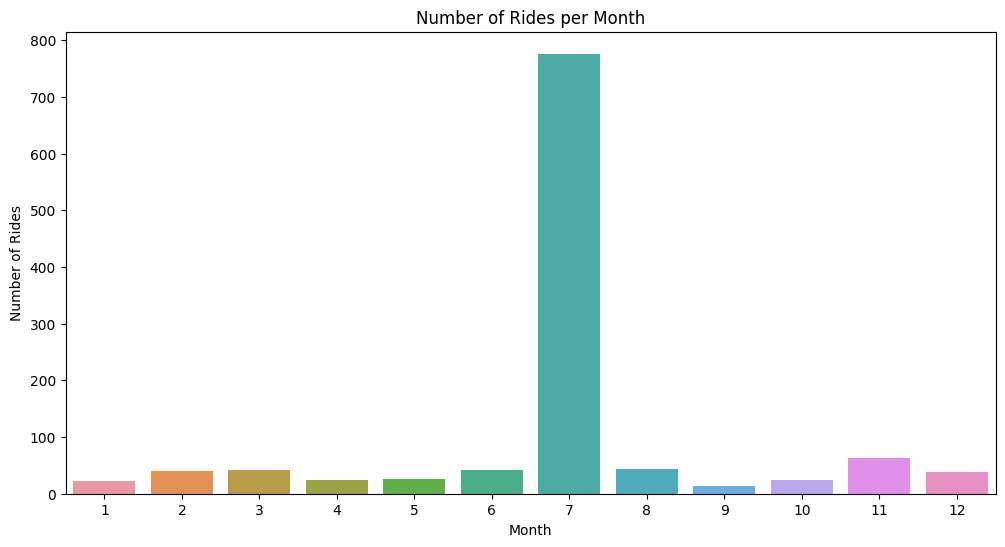

In [20]:
# Plot the number of rides per month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df)
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()


The data indicates a notable concentration of rides in the month of **July**. This could be attributed to various factors, including favorable weather conditions, holidays, or special events during that month.

#### Recommendations:

Leverage the popularity of July rides for targeted promotions or marketing campaigns.
Investigate external factors influencing ride patterns and consider adapting strategies accordingly.

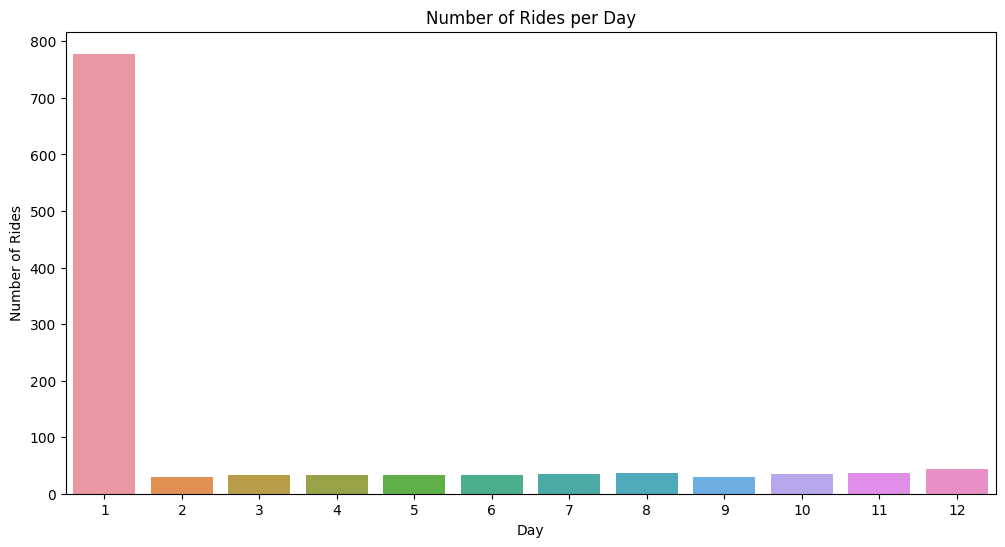

In [21]:
# Plot the number of rides per day
plt.figure(figsize=(12, 6))
sns.countplot(x='Day', data=df)
plt.title('Number of Rides per Day')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.show()

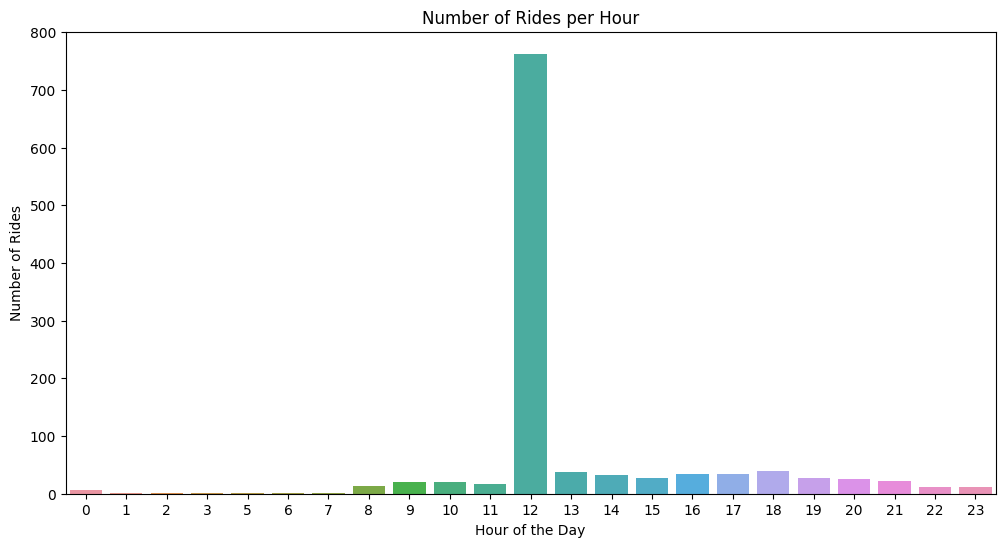

In [22]:
# Plot the number of rides per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
plt.title('Number of Rides per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

The data highlights a significant concentration of rides around noon, particularly at 12 PM. Understanding peak usage hours is crucial for operational efficiency and resource allocation.

#### Recommendations:

* Optimize resource allocation, ensuring an adequate supply of vehicles during peak hours.
* Consider time-specific promotions or incentives to further boost usage during non-peak hours.

## **<u>Categorical Analysis</u>**

### Distribution of Ride Categories:

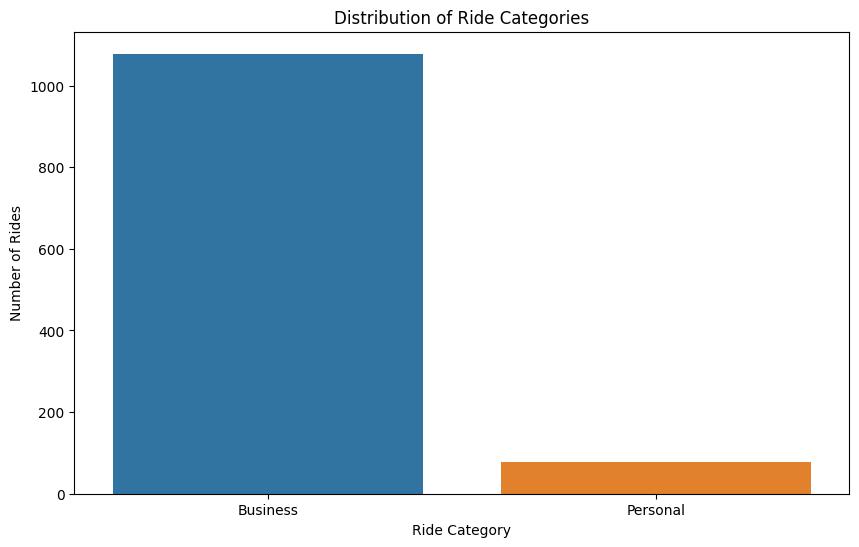

In [23]:
# Plot the distribution of ride categories
plt.figure(figsize=(10, 6))
sns.countplot(x='CATEGORY', data=df, order=df['CATEGORY'].value_counts().index)
plt.title('Distribution of Ride Categories')
plt.xlabel('Ride Category')
plt.ylabel('Number of Rides')
plt.show()

The data reveals a noteworthy trend, indicating that a substantial portion of the rides fall under the **business category**. This insight is crucial for understanding the user base and tailoring services to meet specific needs.

#### Recommendations:

* Tailor promotions or features to cater to business users.
* Consider partnerships or features that enhance the business-use experience.

### Purpose Analysis:

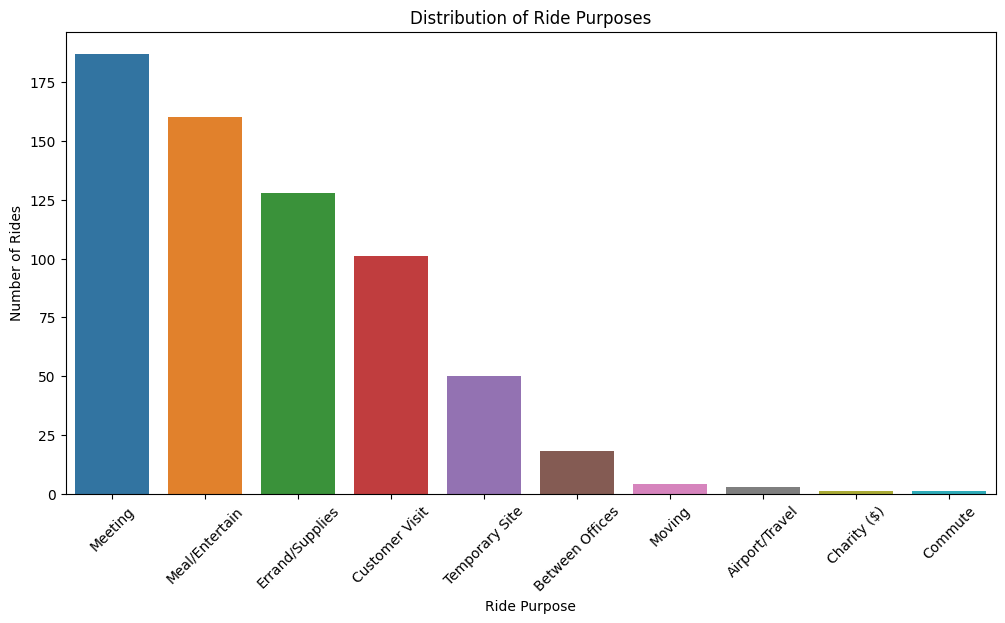

In [24]:
# Plot the distribution of ride purposes
plt.figure(figsize=(12, 6))
sns.countplot(x='PURPOSE', data=df, order=df['PURPOSE'].value_counts().index)
plt.title('Distribution of Ride Purposes')
plt.xlabel('Ride Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Understanding the primary reasons for rides provides valuable information about user behavior and preferences. The analysis indicates that the top purposes include meetings, meals/entertainment, errands/supplies, and customer visits.

#### Recommendations:

* Tailor promotions or loyalty programs based on popular ride purposes.
* Consider partnerships with businesses related to top ride purposes.

## **<u>Duration Analysis</u>**

### Distribution of ride durations in minutes

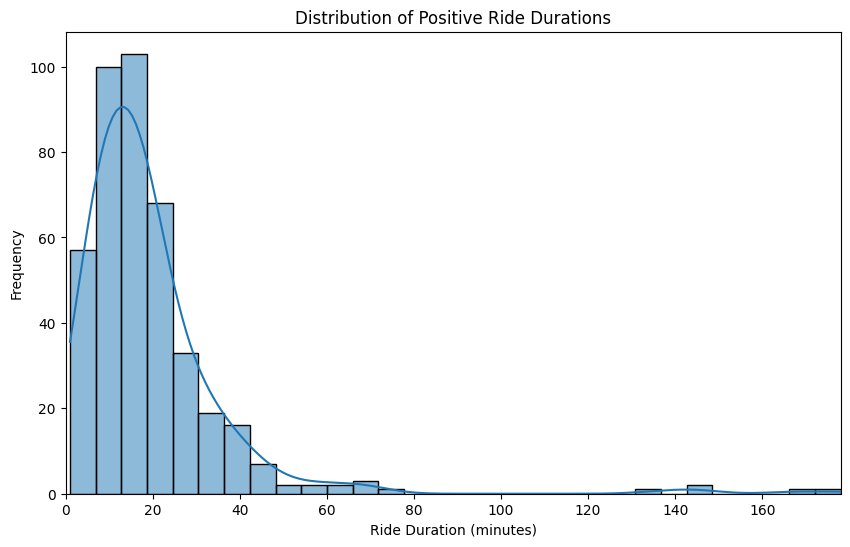

In [25]:
# Filter out rides with a duration greater than 0
positive_durations = df[df['DURATION_MINUTES'] > 0]['DURATION_MINUTES']

# Distribution of positive ride durations in minutes
plt.figure(figsize=(10, 6))
sns.histplot(positive_durations, bins=30, kde=True)
plt.title('Distribution of Positive Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, positive_durations.max())  # Set the x-axis range
plt.show()


The analysis of ride durations reveals that a significant portion of rides falls within the 0 to 40 minutes range. This is a crucial insight into user behavior, indicating that most users prefer relatively short-duration rides.

#### Recommendations:

* Optimize service and pricing models to align with the prevalent ride duration preferences.
* Consider introducing packages or promotions tailored to short-duration rides.

### Ride duration against distance

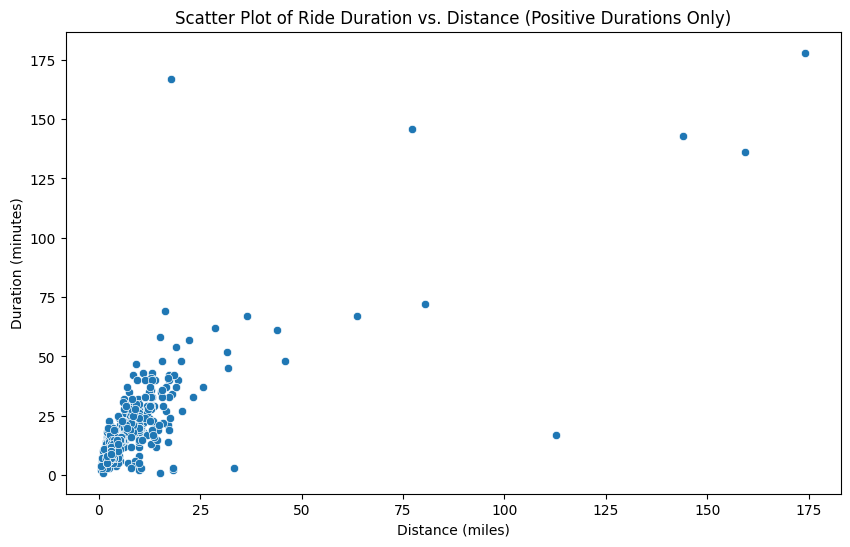

In [26]:
# Filter out rides with a duration greater than 0
positive_durations = df[df['DURATION_MINUTES'] > 0]

# Scatter plot of ride duration against distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MILES', y='DURATION_MINUTES', data=positive_durations)
plt.title('Scatter Plot of Ride Duration vs. Distance (Positive Durations Only)')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.show()


Understanding the typical distance and duration of rides is crucial for optimizing services and predicting user behavior.

#### Recommendations:

* Optimize pricing or promotions for rides falling within the most common distance range.
* Consider loyalty programs or incentives for longer-distance rides.

## **<u>User Behaviour Analysis</u>**

### Frequency of rides per purpose

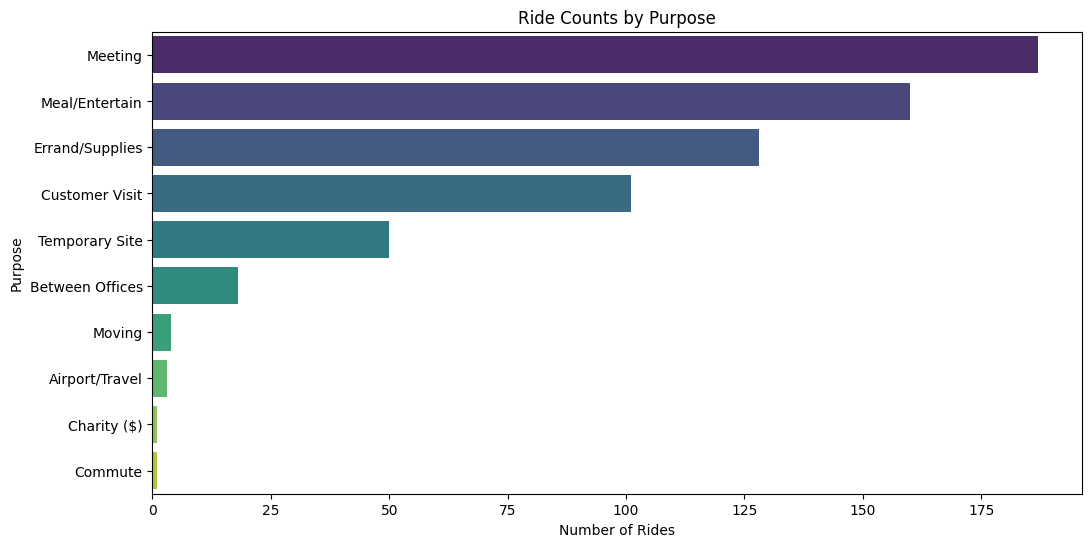

In [27]:
ride_purpose_counts = df['PURPOSE'].value_counts()

# Plot the distribution of ride counts per purpose
plt.figure(figsize=(12, 6))
sns.barplot(x=ride_purpose_counts.values, y=ride_purpose_counts.index, palette='viridis')
plt.title('Ride Counts by Purpose')
plt.xlabel('Number of Rides')
plt.ylabel('Purpose')
plt.show()

Understanding the primary reasons for rides provides valuable information about user behavior and preferences. The analysis indicates that the top purposes include meetings, meals/entertainment, errands/supplies, and customer visits.

### Peak ride times

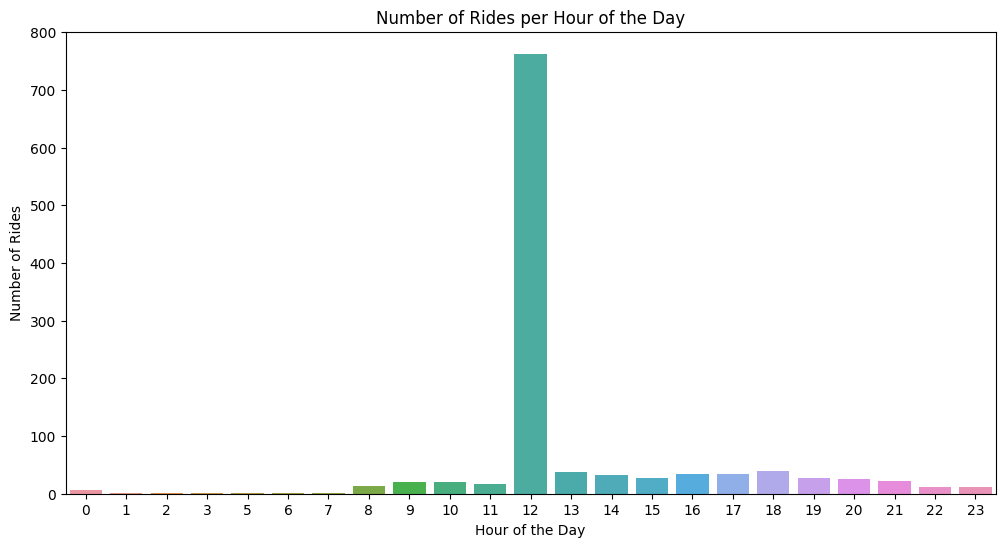

In [28]:
df['Hour'] = df['START_DATE'].dt.hour

# Plot the number of rides per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
plt.title('Number of Rides per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()


### Popular destinations

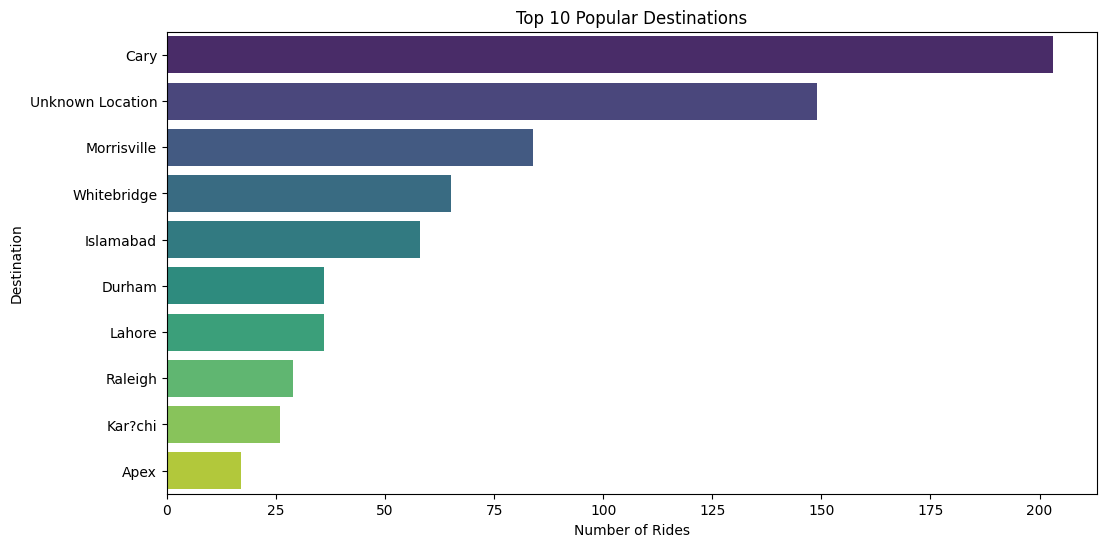

In [29]:
popular_destinations = df['STOP'].value_counts().head(10)

# Plot the top 10 popular destinations
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_destinations.values, y=popular_destinations.index, palette='viridis')
plt.title('Top 10 Popular Destinations')
plt.xlabel('Number of Rides')
plt.ylabel('Destination')
plt.show()


Understanding the most popular destination, in this case, **Cary**, is crucial for businesses to target promotions, improve services, and allocate resources efficiently.

#### **Key Findings**:

**Top Destination**: Cary stands out as the most frequented destination among the rides.

**User Preferences**: Investigate reasons for the popularity of Cary. Are there specific attractions, events, or businesses driving this trend?

**Business Opportunities**: Explore potential partnerships or marketing strategies to capitalize on the popularity of rides to Cary.

#### Recommendations:

* Tailor promotions or partnerships that align with the interests of users traveling to Cary.
* Consider expanding services or offerings in and around Cary based on user demand.

## **<u>Exploration of Missing Values</u>**

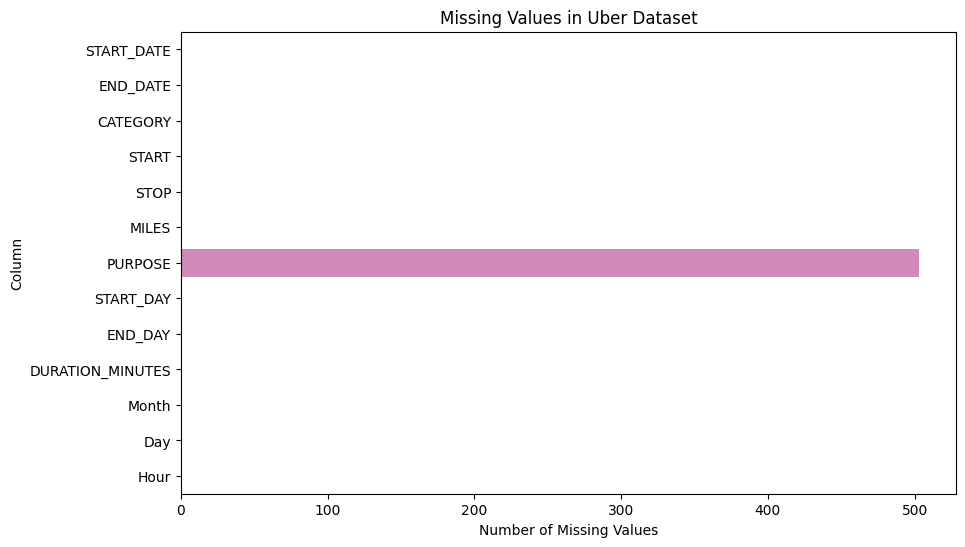

In [30]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Plot the missing values using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='muted')
plt.title('Missing Values in Uber Dataset')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column')
plt.show()

Identifying and addressing missing values is essential for a comprehensive analysis. In this dataset, it's observed that the majority of missing values are related to the **purpose** of the ride.

#### **Key Findings**:

**Missing Data**: The 'Purpose' column has a significant number of missing values.
**Impact on Analysis**: Since the purpose of the ride is crucial for understanding user behavior, addressing missing values is essential for a more accurate analysis.
**Strategies**: Explore strategies to impute or fill missing values. This could involve using statistical measures, machine learning models, or leveraging other correlated information.

#### Recommendations:

* **Imputation Techniques**: Consider imputation methods such as mean, median, or machine learning-based strategies to fill missing values in the 'Purpose' column.
* **Data Collection**: Evaluate the data collection process to minimize missing values in future datasets.
 






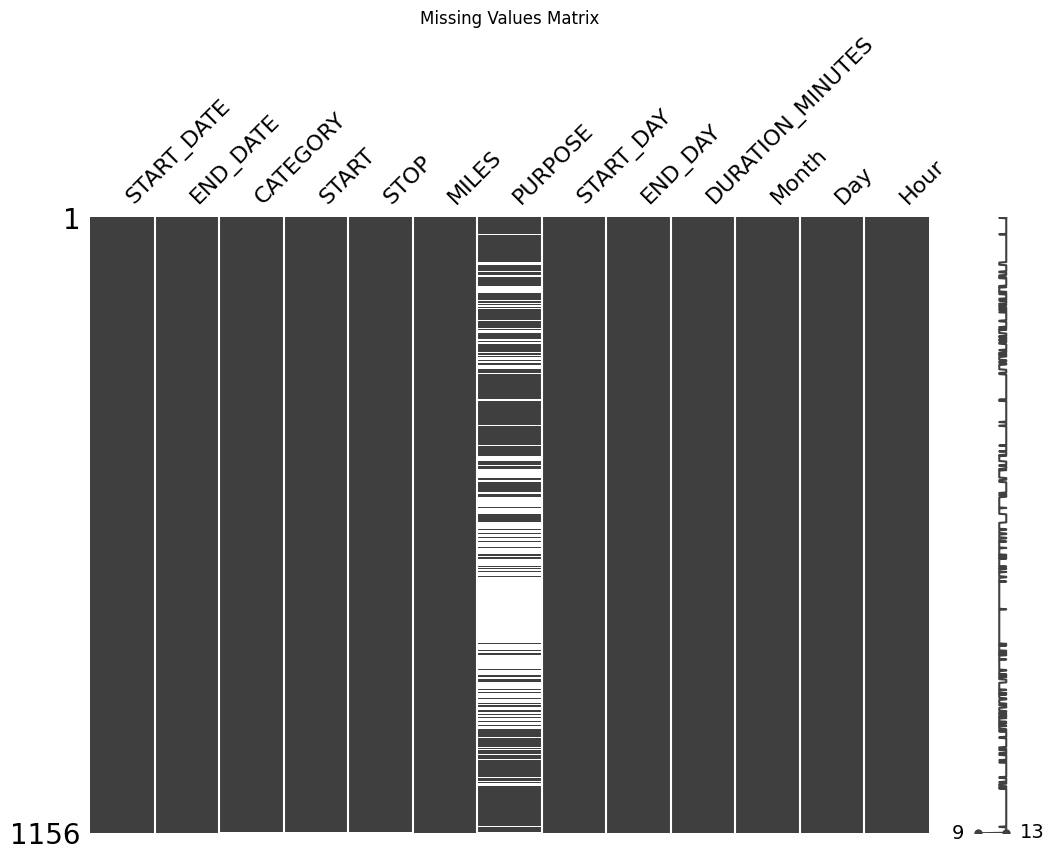

In [31]:
import missingno as msno

# Visualize missing values using a matrix
msno.matrix(df, figsize=(12, 8))
plt.title('Missing Values Matrix')
plt.show()


## **<u>Correlation Analysis</u>** 

### Correlations Between Numerical Features:

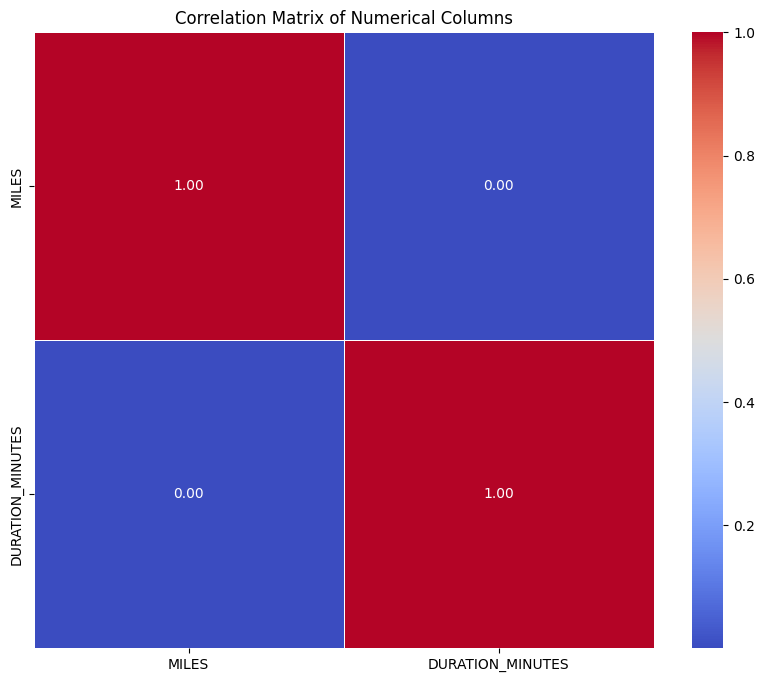

In [32]:
# Selecting numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## **<u>Predictive Modeling</u>**

### Linear Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Selecting features and target variable
features = df[['MILES']]  # Add more features as needed
target = df['DURATION_MINUTES']


In [35]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [36]:
# Creating a linear regression model
model = LinearRegression()

In [37]:
# Training the model
model.fit(X_train, y_train)


LinearRegression()

In [38]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [39]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 975.6686409070865
R-squared: -0.7067211938837943


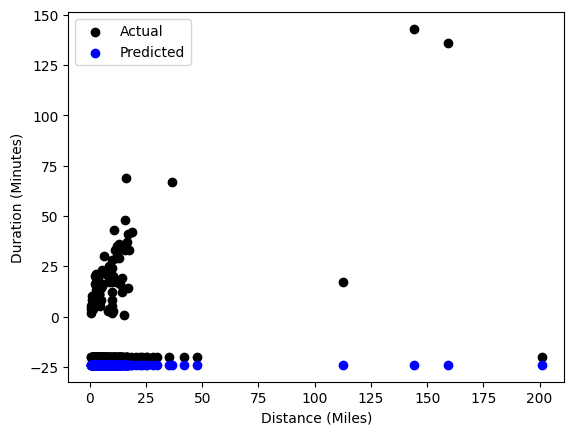

In [40]:
# Visualizing the predictions
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('Distance (Miles)')
plt.ylabel('Duration (Minutes)')
plt.legend()
plt.show()

## **<u>Challenges and Limitations</u>**:

1. **Missing Data:**
   - **Purpose Column:** A significant number of entries in the 'Purpose' column are missing, limiting the ability to fully understand the diverse reasons for rides.
   - **User ID, Latitude, Longitude:** The absence of user-specific identifiers (User ID) and precise location data (Latitude, Longitude) restricts the analysis of individual user patterns and detailed spatial insights.

2. **Temporal Resolution:**
   - **Limited Time Frame:** The dataset covers a specific time range, and the analysis might not capture seasonal variations or long-term trends.

3. **Spatial Resolution:**
   - **Lack of Location Details:** The absence of precise latitude and longitude coordinates hinders a granular spatial analysis. Detailed origin-destination patterns and geographic hotspots cannot be accurately determined.

4. **Categorical Ambiguity:**
   - **Purpose Categorization:** The 'Purpose' column, while providing valuable information, is subject to subjective interpretation. Some ride purposes may be inherently ambiguous or overlap.

5. **Imputation Challenges:**
   - **Handling Missing Values:** Strategies for imputing missing values in the 'Purpose' column may introduce uncertainty. Imputed values might not accurately represent the true nature of missing data.

6. **Limited User-level Analysis:**
   - **User Behavior Insights:** Without individual user identifiers, it's challenging to conduct personalized analyses, such as identifying loyal users, repeat patterns, or individual preferences.

7. **Temporal and Spatial Aggregation:**
   - **Generalization:** Aggregating data over time and space (e.g., daily or hourly averages) may lead to oversimplification, potentially missing nuanced patterns.

8. **Data Quality:**
   - **Assumed Data Integrity:** The analysis assumes data integrity and accuracy in the recorded information. Any data entry errors or inconsistencies may impact the reliability of the findings.

9. **Bias Considerations:**
   - **Demographic Bias:** The absence of demographic information limits insights into the diversity of users. The findings may not be representative of different user groups.
   - **Sampling Bias:** If the dataset is not a random sample of all rides, certain patterns may be overrepresented or underrepresented.

10. **Scope of Purpose Classification:**
    - **Scope Limitations:** The 'Purpose' column may not cover all possible ride purposes. Some user activities might not fit neatly into predefined categories.

Acknowledging these challenges and limitations is crucial for interpreting the results accurately and guiding future improvements in data collection and analysis. Additionally, addressing missing information and enhancing data granularity would contribute to more robust and insightful analyses.

 ## **<u>Conclusion</u>**:

The analysis of the rideshare dataset reveals several key insights into user behavior, ride patterns, and popular destinations. Here's a concise summary of the findings:

1. **Temporal Patterns:**
   - **Peak Day:** Most rides are taken on Fridays, indicating higher usage towards the end of the workweek.
   - **Peak Hour:** A significant portion of rides occurs around noon, suggesting lunchtime or midday activities.

2. **Ride Duration:**
   - **Duration Distribution:** The majority of ride durations fall within the 0 to 40-minute range, indicating relatively short trips.

3. **Time of Day:**
   - **Popular Time:** The busiest time for rides is at 12 PM, possibly aligning with lunch breaks or midday activities.

4. **Ride Categories:**
   - **Business vs. Personal:** Business rides significantly outnumber personal rides, highlighting the professional nature of the service.

5. **Purpose of Rides:**
   - **Top Purposes:** The most common purposes for rides are meetings, followed by meal/entertainment, errands/supplies, and customer visits.
   - **Missing Values:** The 'Purpose' column has notable missing values, suggesting a need for imputation strategies.

6. **Distance and Duration:**
   - **Trip Characteristics:** Most rides cover distances between 0 and 50 miles, typically taking 0 to 75 minutes.

7. **Popular Destination:**
   - **Top Destination:** Cary emerges as the most popular destination, indicating a concentration of ride activities in this location.

8. **Missing Values - Purpose:**
   - **Challenges:** The 'Purpose' column has a significant number of missing values.
   - **Recommendations:** Imputation strategies such as mean, median, or advanced methods can be explored to enhance data completeness.

In conclusion, these insights provide valuable information for optimizing rideshare services, understanding user preferences, and addressing data completeness challenges. Future analyses and improvements in data collection processes could further enhance the depth of understanding and decision-making capabilities.
